# Project 01: NYC 311 Service Request Analysis

In [6]:
import pandas as pd  
import numpy as np

In [7]:
#Importing file
sr=pd.read_csv("C:\\Users\\Admin\\Desktop\\Advance Python\\Project\\Data analysis of service request (311) calls from New York City\\311-service-requests-nyc\\311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [8]:
#Exploring the data
#finding out shape 
sr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
#Basic EDA
#identifying null values
sr

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [11]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [10]:
sr.shape

(364558, 53)

In [11]:
sr.isna()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364554,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364555,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364556,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [12]:
sr.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [13]:
#Removing null columns
srn=sr.drop(["Garage Lot Name","Taxi Pick Up Location","Taxi Company Borough","Vehicle Type","School or Citywide Complaint"],axis='columns')

In [14]:
srn.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [15]:
srn.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,40.912869,-73.700715


In [16]:
srn.info

<bound method DataFrame.info of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1         32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2         32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3         32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4         32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...            ...                     ...                     ...    ...   
364553    29609918  01/01/2015 12:04:44 AM  01/01/2015 10:22:31 AM   NYPD   
364554    29608392  01/01/2015 12:04:28 AM  01/01/2015 02:25:02 AM   NYPD   
364555    29607589  01/01/2015 12:01:30 AM  01/01/2015 12:20:33 AM   NYPD   
364556    29610889  01/01/2015 12:01:29 AM  01/01/2015 02:42:22 AM   NYPD   
364557    29611816  01/01/2015 12:00:50 AM  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name    

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

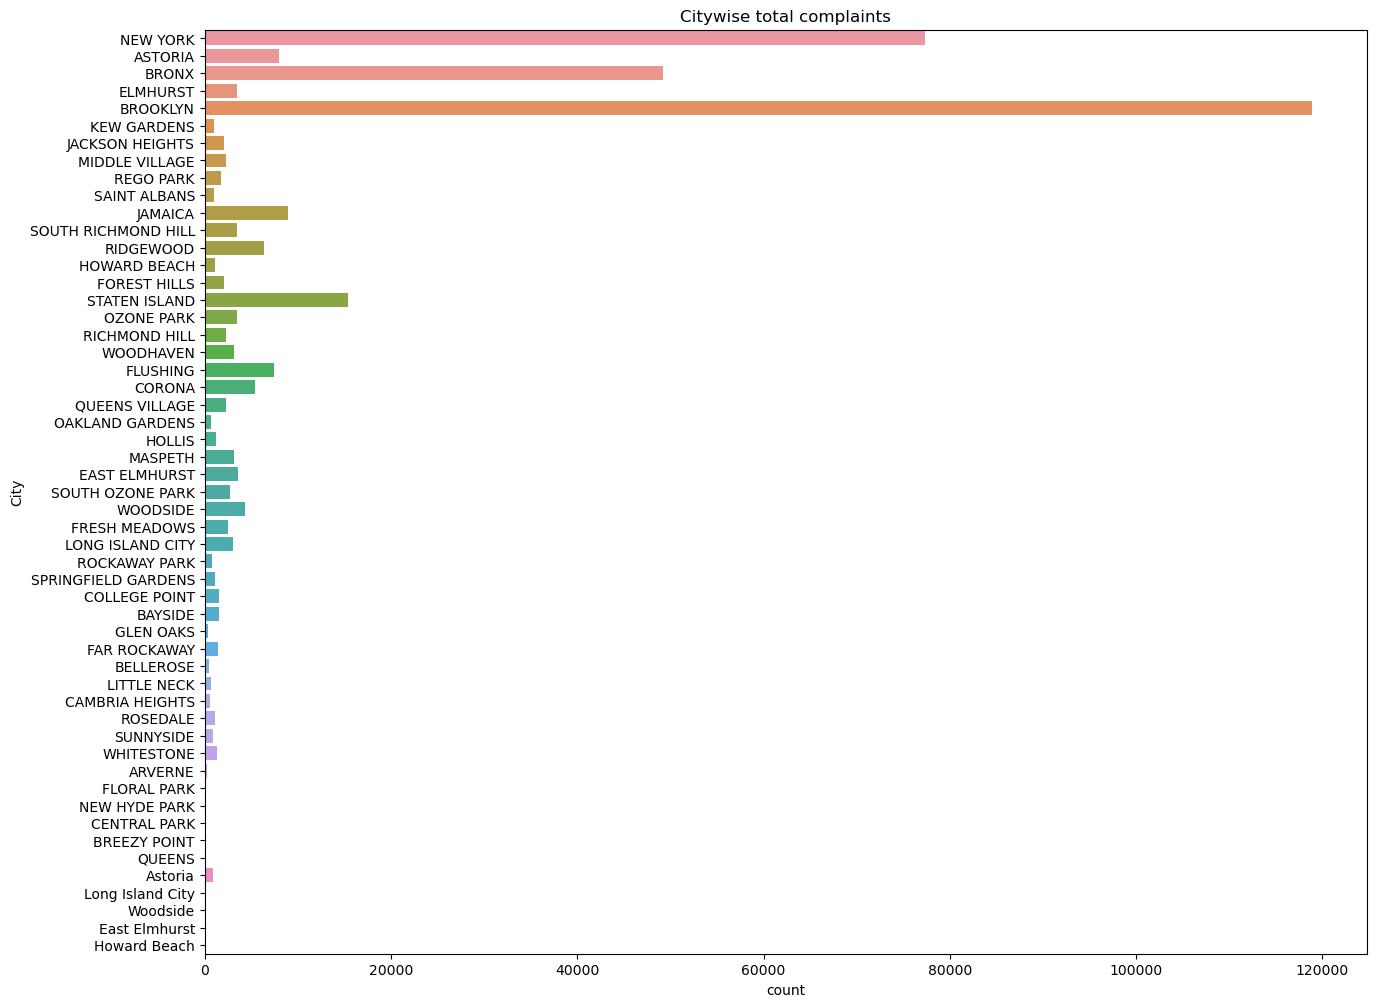

In [18]:
#citywise complaint plot
plt.figure(figsize=(15,12))
plt.title('Citywise total complaints')
sns.countplot(y='City',data=srn)
plt.show()

In [19]:
#scatter plot for complaint concentration across brooklyn
brooklyn_data = srn[srn['Borough'] == 'BROOKLYN']

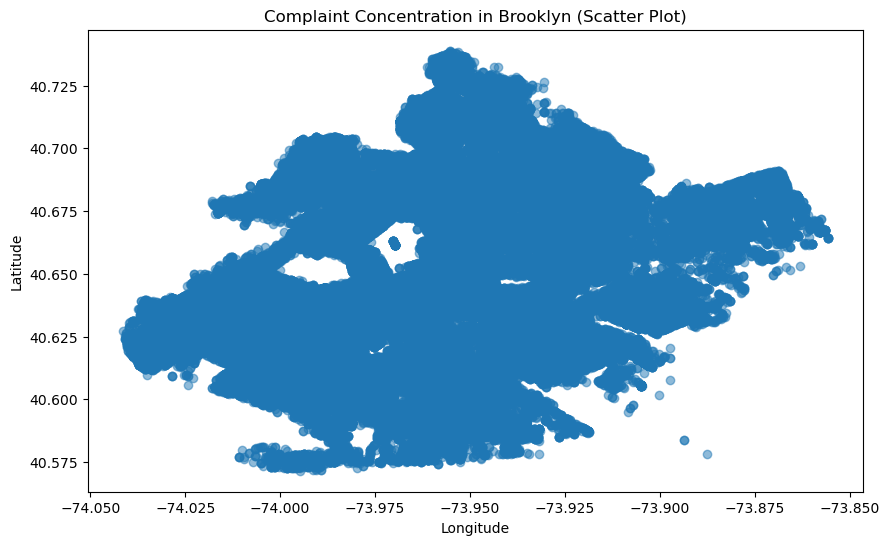

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(brooklyn_data['Longitude'], brooklyn_data['Latitude'], alpha=0.5)
plt.title('Complaint Concentration in Brooklyn (Scatter Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

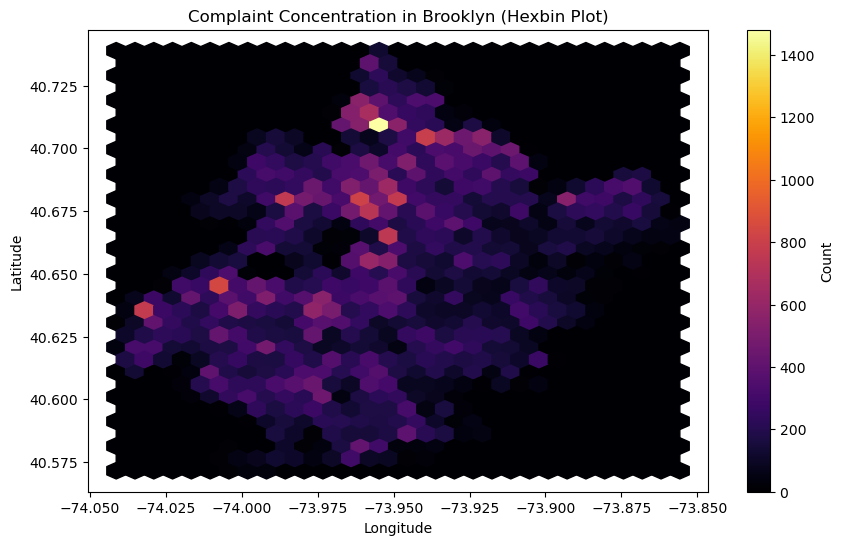

In [21]:
# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(brooklyn_data['Longitude'], brooklyn_data['Latitude'], gridsize=30, cmap='inferno')
plt.title('Complaint Concentration in Brooklyn (Hexbin Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Count')
plt.show()

In [22]:
#find major type of complaints
major_complaint = srn.loc[:, "Complaint Type"]

In [23]:
major_complaint.unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [24]:
complaint_count = major_complaint.value_counts()

In [25]:
complaint_count
#Blocked driveway is the major complaint.

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

Text(0.5, 1.0, 'Count of Complaints by Type')

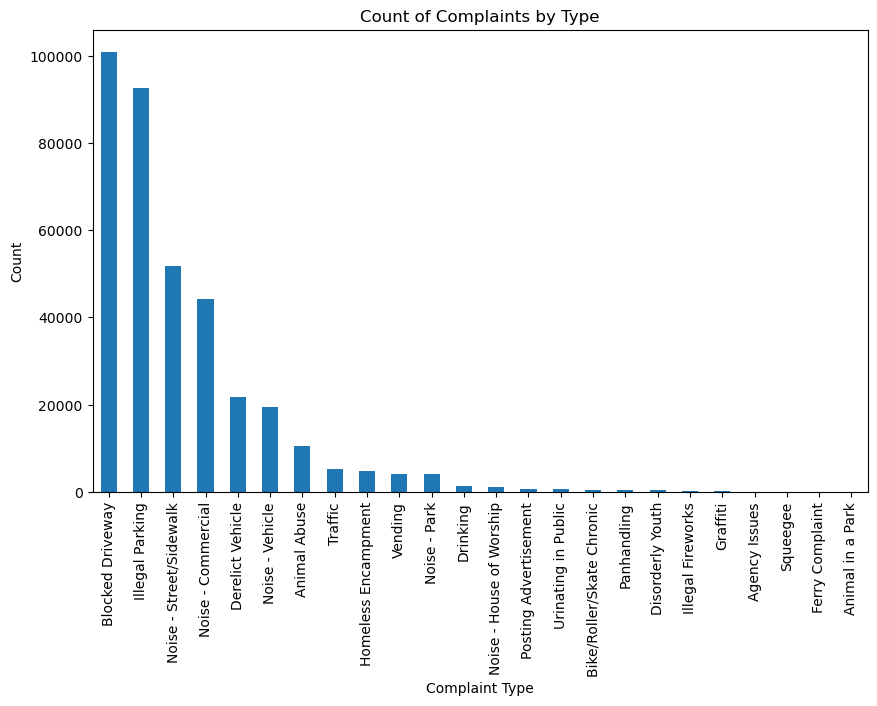

In [30]:
 #bar graph of count vs. complaint types

plt.figure(figsize=(10, 6))
complaint_count.plot(kind='bar')
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.title("Count of Complaints by Type")

In [31]:
#find top 10 type of complaints
top_10_complaints = major_complaint.value_counts().head(10)

In [32]:
top_10_complaints

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [33]:
#  types of complaints in each city
complaints_by_city = srn.groupby("City")["Complaint Type"].apply(list).reset_index()

In [34]:
complaints_by_city

,City,Complaint Type
0,ARVERNE,"[Illegal Parking, Noise - Commercial, Animal A..."
1,ASTORIA,"[Blocked Driveway, Noise - Commercial, Noise -..."
2,Astoria,"[Illegal Parking, Illegal Parking, Noise - Str..."
3,BAYSIDE,"[Blocked Driveway, Derelict Vehicle, Illegal P..."
4,BELLEROSE,"[Derelict Vehicle, Blocked Driveway, Blocked D..."
5,BREEZY POINT,"[Noise - Street/Sidewalk, Blocked Driveway, An..."
6,BRONX,"[Blocked Driveway, Illegal Parking, Blocked Dr..."
7,BROOKLYN,"[Illegal Parking, Blocked Driveway, Illegal Pa..."
8,CAMBRIA HEIGHTS,"[Derelict Vehicle, Derelict Vehicle, Blocked D..."
9,CENTRAL PARK,"[Noise - Street/Sidewalk, Noise - Street/Sidew..."


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'ARVERNE'),
  Text(1, 0, 'ASTORIA'),
  Text(2, 0, 'Astoria'),
  Text(3, 0, 'BAYSIDE'),
  Text(4, 0, 'BELLEROSE'),
  Text(5, 0, 'BREEZY POINT'),
  Text(6, 0, 'BRONX'),
  Text(7, 0, 'BROOKLYN'),
  Text(8, 0, 'CAMBRIA HEIGHTS'),
  Text(9, 0, 'CENTRAL PARK'),
  Text(10, 0, 'COLLEGE POINT'),
  Text(11, 0, 'CORONA'),
  Text(12, 0, 'EAST ELMHURST'),
  Text(13, 0, 'ELMHURST'),
  Text(14, 0, 'East Elmhurst'),
  Text(15, 0, 'FAR ROCKAWAY'),
  Text(16, 0, 'FLORAL PARK'),
  Text(17, 0, 'FLUSHING'),
  Text(18, 0, 'FOREST HILLS'),
  Text(19, 0, 'FRESH MEADOWS'),
  Text(20, 0, 'GLEN OAKS'),
  Text(21, 0, 'HOLLIS'),
  Text(22, 0, 'HOWARD BEACH'),
  Text(23, 0, 'Howard Beach'),
  Text(24, 0, 'JACKSON HEIGHTS'),
  Text(25, 0, 'JAMAICA'),
  Text(26, 

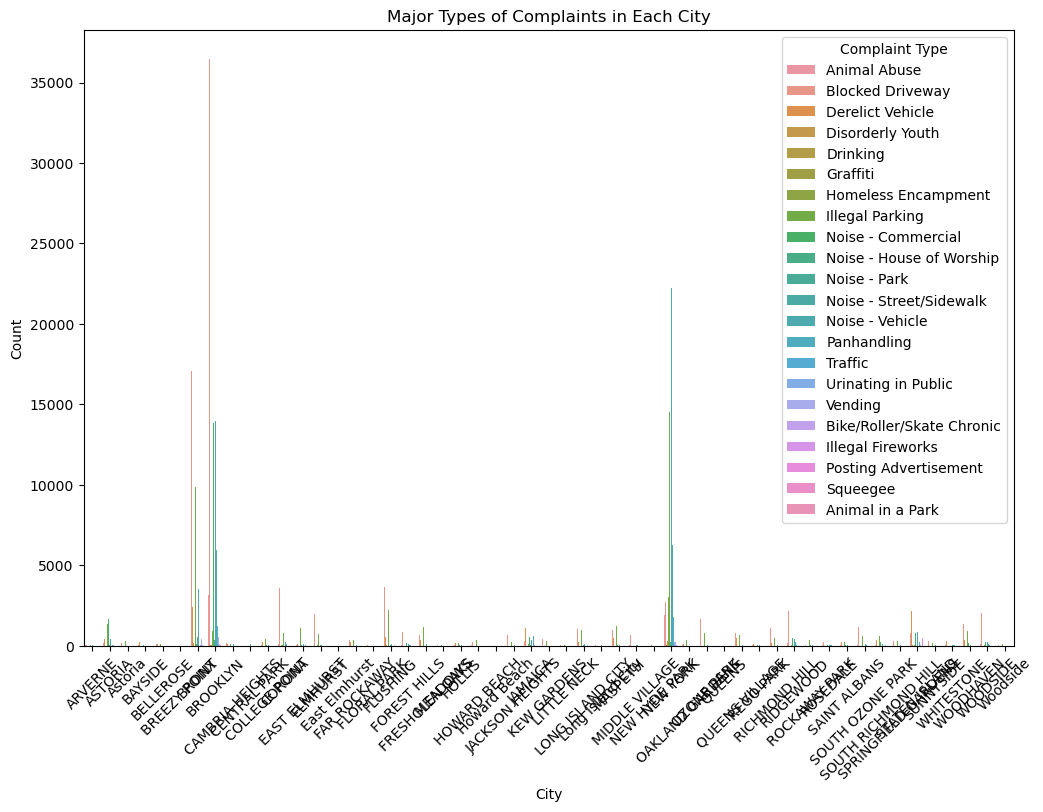

In [38]:
#Visualize the major types of complaints in each city
complaints_by_city = srn.groupby(["City", "Complaint Type"]).size().reset_index(name="Count")
plt.figure(figsize=(12, 8))
sns.barplot(x="City", y="Count", hue="Complaint Type", data=complaints_by_city)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Major Types of Complaints in Each City")
plt.xticks(rotation=45)

In [46]:
# Check the average response time across various types of complaints
srn["Created Date"] = pd.to_datetime(srn["Created Date"])
srn["Resolution Action Updated Date"] = pd.to_datetime(srn["Resolution Action Updated Date"])
srn["Response Time"] = srn["Resolution Action Updated Date"] - srn["Created Date"]

In [47]:
average_response_time = srn.groupby("Complaint Type")["Response Time"].mean()
print(average_response_time)

Complaint Type
Agency Issues                  0 days 05:04:16.375000
Animal Abuse                0 days 05:00:27.596201329
Animal in a Park                     14 days 00:50:34
Bike/Roller/Skate Chronic   0 days 03:38:38.795789473
Blocked Driveway            0 days 04:30:27.530400906
Derelict Vehicle            0 days 07:02:26.346842031
Disorderly Youth            0 days 03:26:01.996825396
Drinking                    0 days 03:50:17.967236467
Ferry Complaint                      63 days 02:41:28
Graffiti                    0 days 06:27:54.337579617
Homeless Encampment         0 days 04:17:00.760098421
Illegal Fireworks           0 days 02:48:33.046511627
Illegal Parking             0 days 04:20:44.953754389
Noise - Commercial          0 days 03:03:54.565926907
Noise - House of Worship    0 days 03:09:49.978464419
Noise - Park                0 days 03:23:35.628026412
Noise - Street/Sidewalk     0 days 03:23:07.888647697
Noise - Vehicle             0 days 03:29:19.338911917
Panhandling  